In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load csv data from local

In [19]:
df = pd.read_csv("..\\data\\retail_sales_dataset.csv")

dataframe

In [7]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


top 10 expensive price per unit

In [20]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [22]:
df["Price per Unit"].sort_values(ascending=False)[:10]


280    500
104    500
936    500
136    500
604    500
138    500
486    500
530    500
143    500
696    500
Name: Price per Unit, dtype: int64


different tiers of price per unit

In [28]:
sorted(df["Price per Unit"].unique(), reverse=True)

[500, 300, 50, 30, 25]

customer spending based on item price

In [23]:
df["Price per Unit"].value_counts()

Price per Unit
50     211
25     210
500    199
300    197
30     183
Name: count, dtype: int64

famous category of products

In [29]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

gender tendency for purchasing product category

In [31]:
df[["Product Category","Gender"]].value_counts()

Product Category  Gender
Clothing          Male      177
                  Female    174
Electronics       Male      172
                  Female    170
Beauty            Female    166
                  Male      141
Name: count, dtype: int64

monthly sales

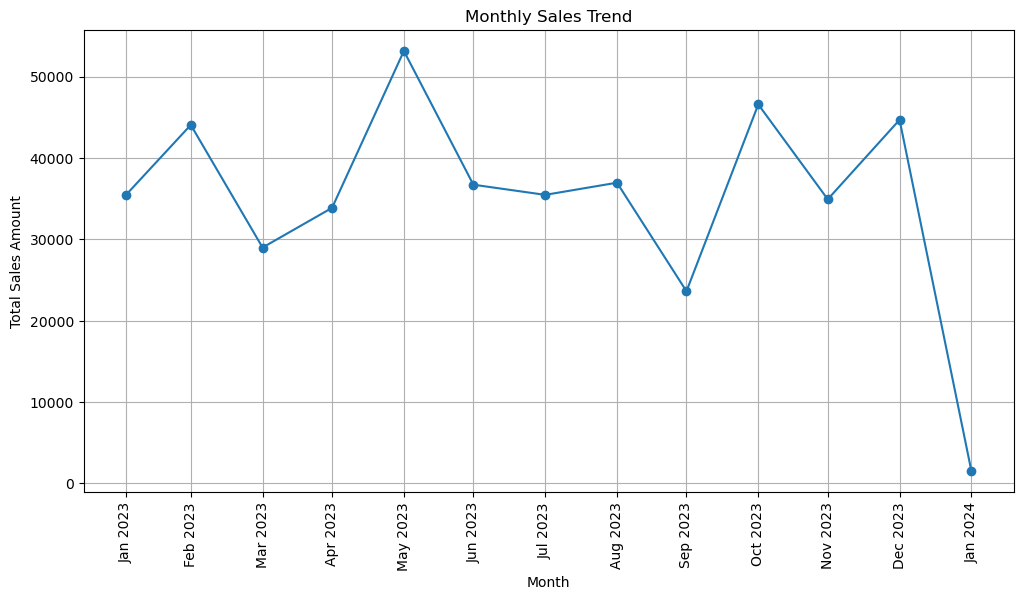

In [39]:
df['Date']=pd.to_datetime(df['Date'])
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=90)
plt.grid(True)
plt.show()

In [41]:
monthly_sales

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64